In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [81]:
data = pd.read_excel(r"C:\Users\augus\OneDrive\Desktop\js\Cargo predict\datas\dataset\Agro products_ 2018 to 2022.xlsx")
data.dropna(inplace=True) 
data

,Sail Date.,QTY.(KGS)
0,2018-01-01 00:00:00,13135
1,2018-01-01 00:00:00,15876
2,2018-01-01 00:00:00,71366
3,2018-01-01 00:00:00,14000
4,2018-01-01 00:00:00,24000
...,...,...
8690,31-12-2018,15000
8691,31-12-2018,30000
8692,31-12-2018,28000
8693,31-12-2018,28000


In [82]:
data.info

<bound method DataFrame.info of                Sail Date.  QTY.(KGS)
0     2018-01-01 00:00:00      13135
1     2018-01-01 00:00:00      15876
2     2018-01-01 00:00:00      71366
3     2018-01-01 00:00:00      14000
4     2018-01-01 00:00:00      24000
...                   ...        ...
8690           31-12-2018      15000
8691           31-12-2018      30000
8692           31-12-2018      28000
8693           31-12-2018      28000
8694           31-12-2018      37000

[8695 rows x 2 columns]>

In [83]:
data.index

RangeIndex(start=0, stop=8695, step=1)

In [84]:
data['Sail Date.'] = pd.to_datetime(data['Sail Date.'])
data.to_csv('c_data_18.csv', index=False)

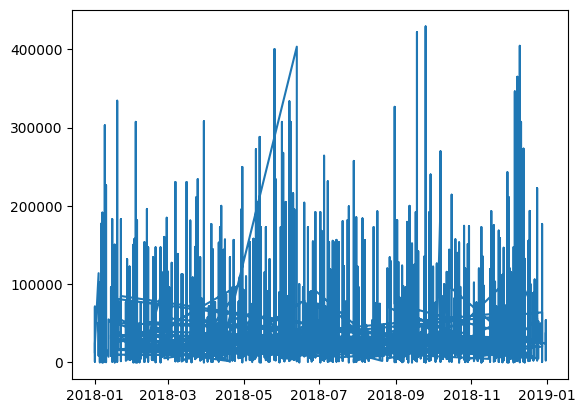

In [85]:
plt.plot(data['Sail Date.'], data['QTY.(KGS)'])

In [86]:
plt.gcf().autofmt_xdate()


<Figure size 640x480 with 0 Axes>

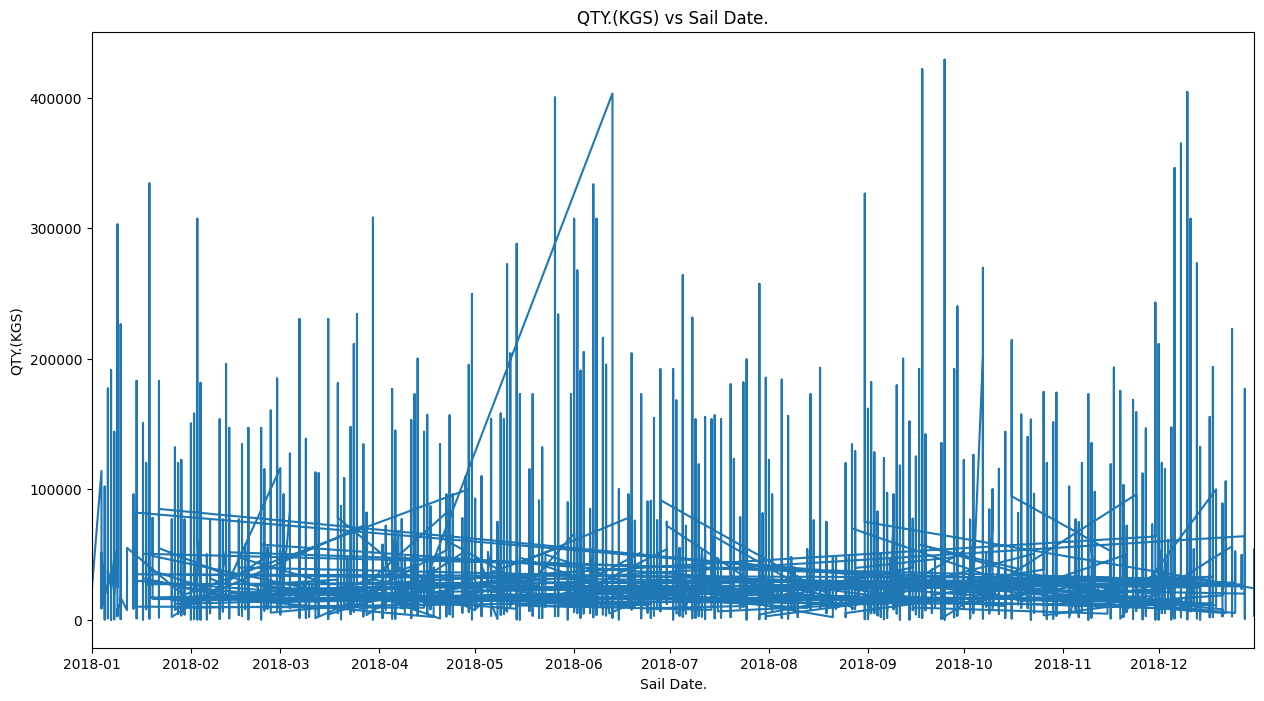

In [87]:
plt.figure(figsize=(15,8))
plt.plot(data['Sail Date.'], data['QTY.(KGS)'])
plt.xlabel('Sail Date.')
plt.ylabel('QTY.(KGS)')
plt.title('QTY.(KGS) vs Sail Date.')
plt.xlim(data['Sail Date.'].min(), data['Sail Date.'].max())
plt.show()



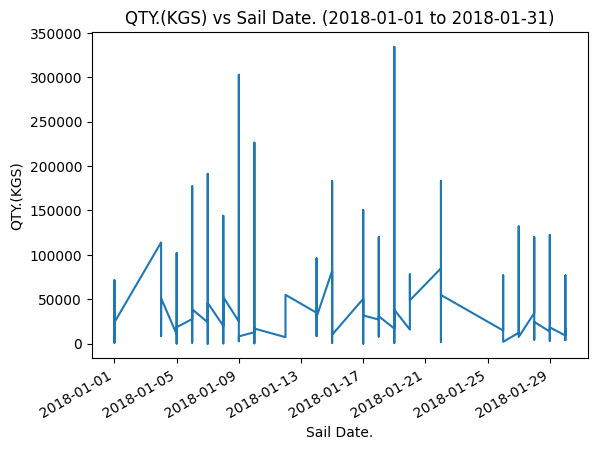

In [88]:


# Filter data within the specified date range
start_date = pd.to_datetime('2018-01-01')
end_date = pd.to_datetime('2018-01-31')
filtered_data = data[(data['Sail Date.'] >= start_date) & (data['Sail Date.'] <= end_date)]

# Plot the graph
plt.plot(filtered_data['Sail Date.'], filtered_data['QTY.(KGS)'])

# Beautify the x-labels
plt.gcf().autofmt_xdate()

# Set labels and title
plt.xlabel('Sail Date.')
plt.ylabel('QTY.(KGS)')
plt.title('QTY.(KGS) vs Sail Date. (2018-01-01 to 2018-01-31)')

# Show the plot
plt.show()


Text(0.5, 1.0, 'Histogram of QTY.(KGS) by Sail Date.')

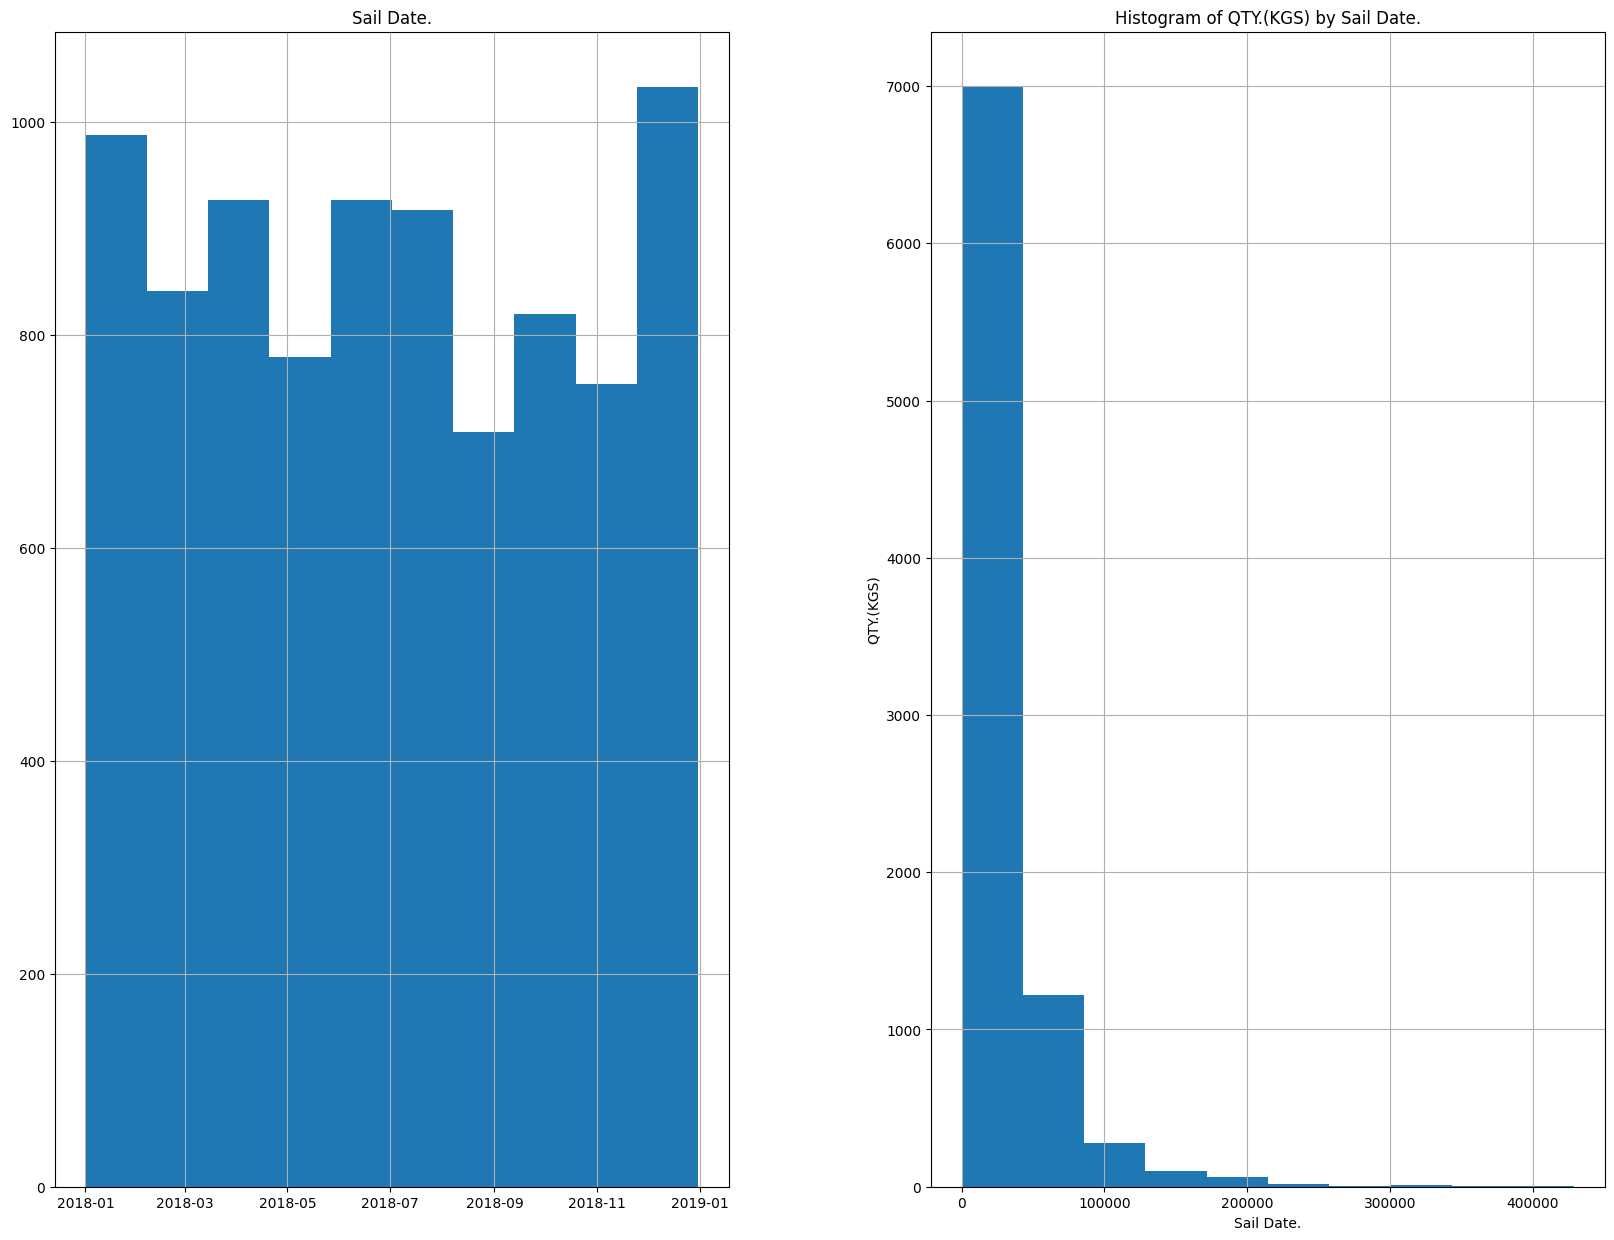

In [89]:
data.hist(figsize=(20,15) )
plt.xlabel('Sail Date.')
plt.ylabel('QTY.(KGS)')
plt.title('Histogram of QTY.(KGS) by Sail Date.')

In [90]:
gf=data.copy

In [91]:
gf

<bound method NDFrame.copy of      Sail Date.  QTY.(KGS)
0    2018-01-01      13135
1    2018-01-01      15876
2    2018-01-01      71366
3    2018-01-01      14000
4    2018-01-01      24000
...         ...        ...
8690 2018-12-31      15000
8691 2018-12-31      30000
8692 2018-12-31      28000
8693 2018-12-31      28000
8694 2018-12-31      37000

[8695 rows x 2 columns]>

In [92]:
data['Sail Date.'] = pd.to_datetime(data['Sail Date.'])

# Group by 'Sail Date' and sum the 'QTY.(KGS)' column
daily_sales= data.groupby(data['Sail Date.'].dt.date)['QTY.(KGS)'].sum().reset_index()

# Display the resulting table
print(daily_sales)



     Sail Date.  QTY.(KGS)
0    2018-01-01     337485
1    2018-01-04     697207
2    2018-01-05    1464201
3    2018-01-06    1841074
4    2018-01-07    1830587
..          ...        ...
263  2018-12-24    3122642
264  2018-12-25     103044
265  2018-12-27     125924
266  2018-12-28    2477337
267  2018-12-31     903441

[268 rows x 2 columns]


In [93]:


# Assuming daily_sales is your DataFrame containing the sales data

# Check if the 'Sail Date.' column is datetime
if pd.api.types.is_datetime64_any_dtype(daily_sales['Sail Date.']):
    # Extract year and month from the 'Sail Date.' column
    daily_sales['Month'] = daily_sales['Sail Date.'].dt.to_period('M')

    # Group the data by month and calculate the total quantity shipped for each month
    monthly_data = daily_sales.groupby('Month')['QTY.(KGS)'].sum()

    # Create a new figure
    plt.figure(figsize=(10, 6))

    # Plotting each quarter with a different color
    plt.plot(monthly_data.index.astype(str), monthly_data.values, marker='o', linestyle='-', color='blue')  # Plot all months in blue
    
    # Set labels and title
    plt.xlabel('Month')
    plt.ylabel('Quantity Shipped (KGS)')
    plt.title('Monthly Analysis of Quantity Shipped 2018')

    # Show the plot
    plt.show()
else:
    print("Error: 'Sail Date.' column could not be converted to datetime.")


Error: 'Sail Date.' column could not be converted to datetime.


In [94]:
data.sort_values(by="Sail Date.")

,Sail Date.,QTY.(KGS)
0,2018-01-01,13135
16,2018-01-01,24000
15,2018-01-01,19200
14,2018-01-01,15918
12,2018-01-01,3100
...,...,...
8670,2018-12-31,15000
8671,2018-12-31,15000
8672,2018-12-31,8000
8665,2018-12-31,23500


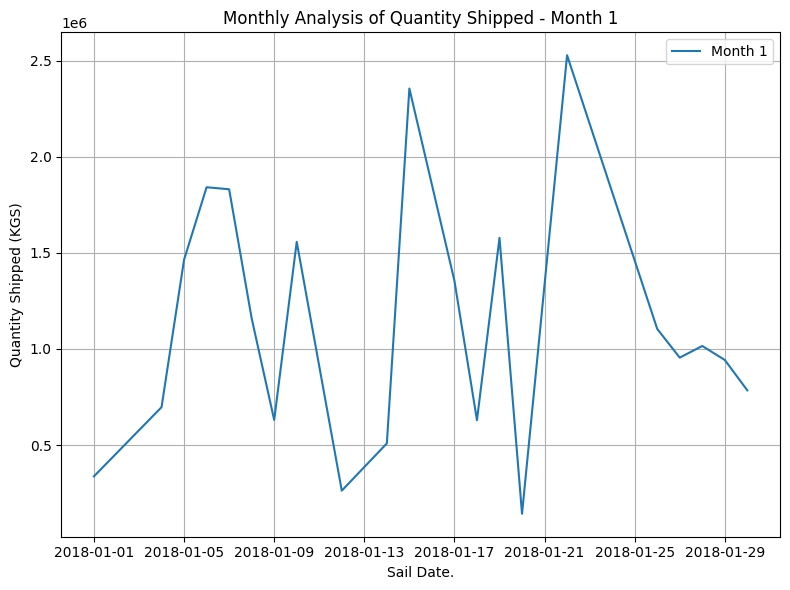

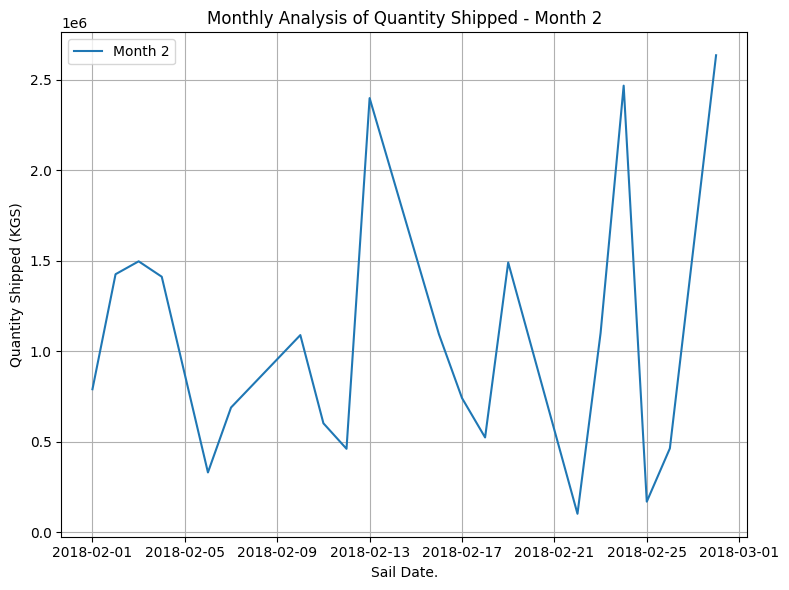

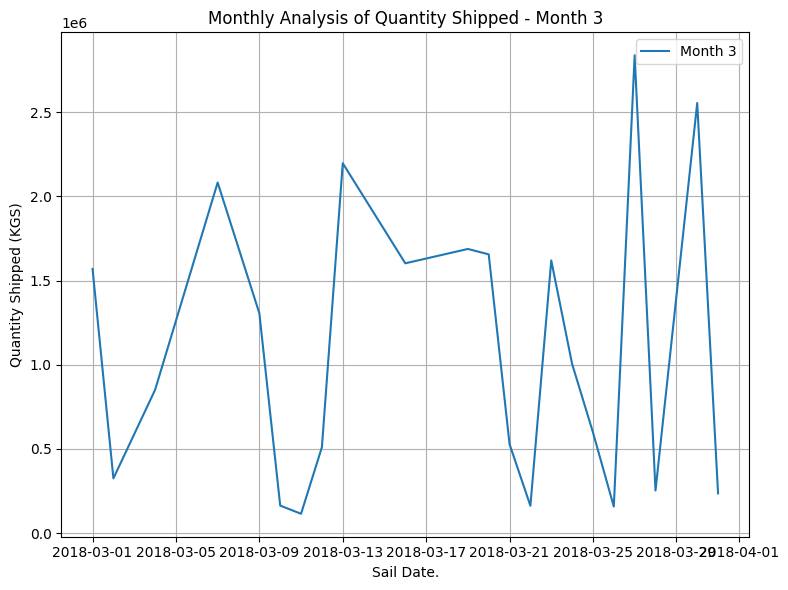

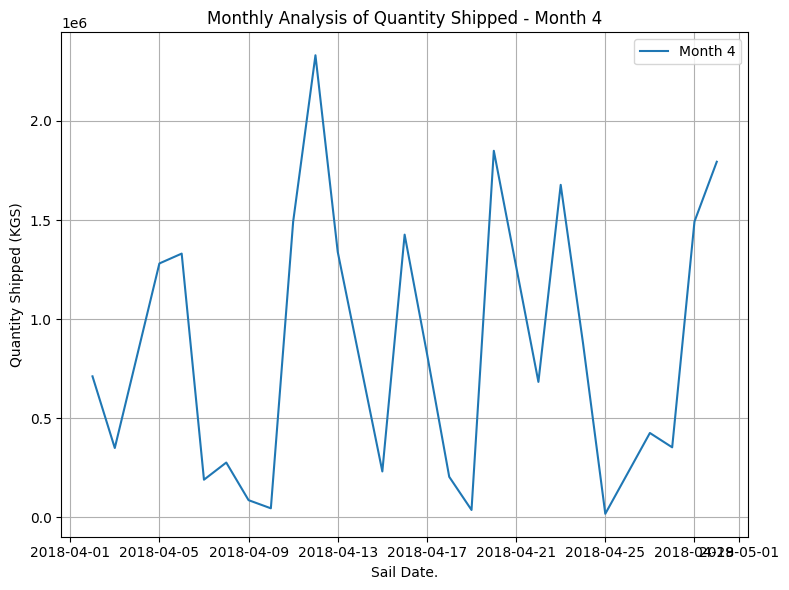

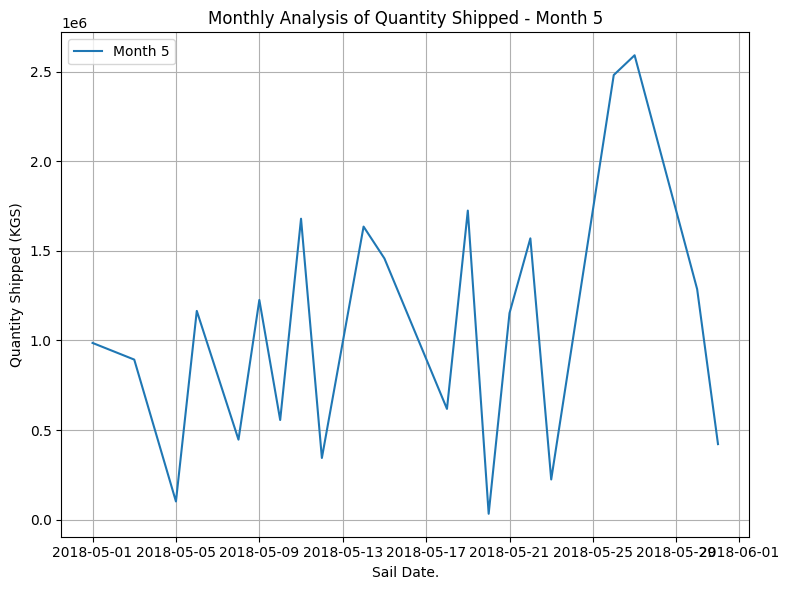

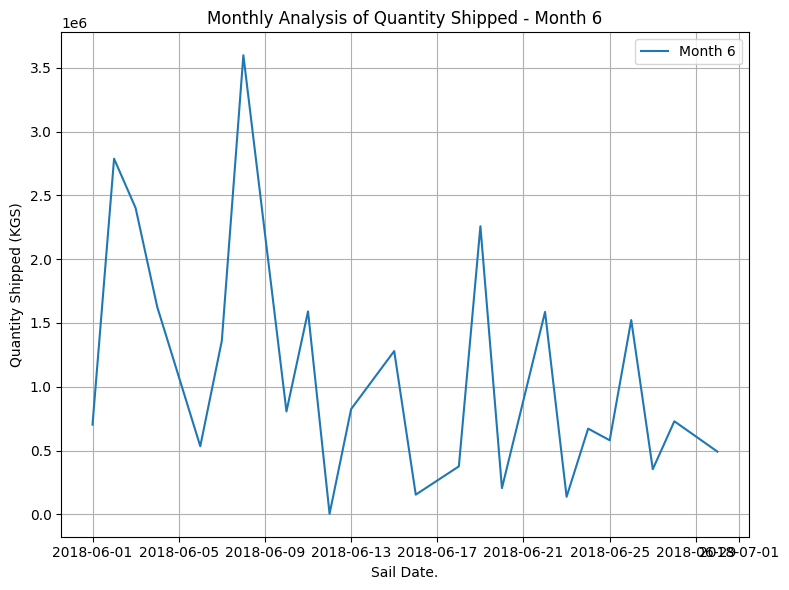

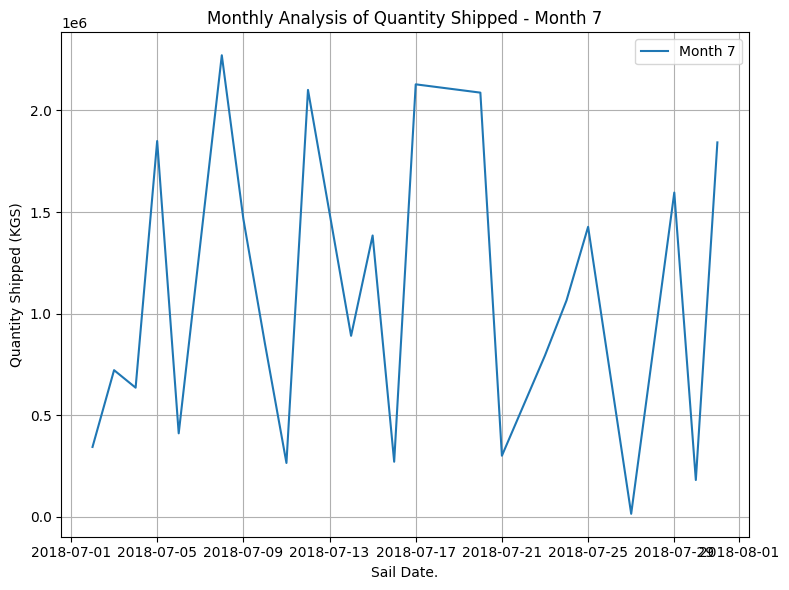

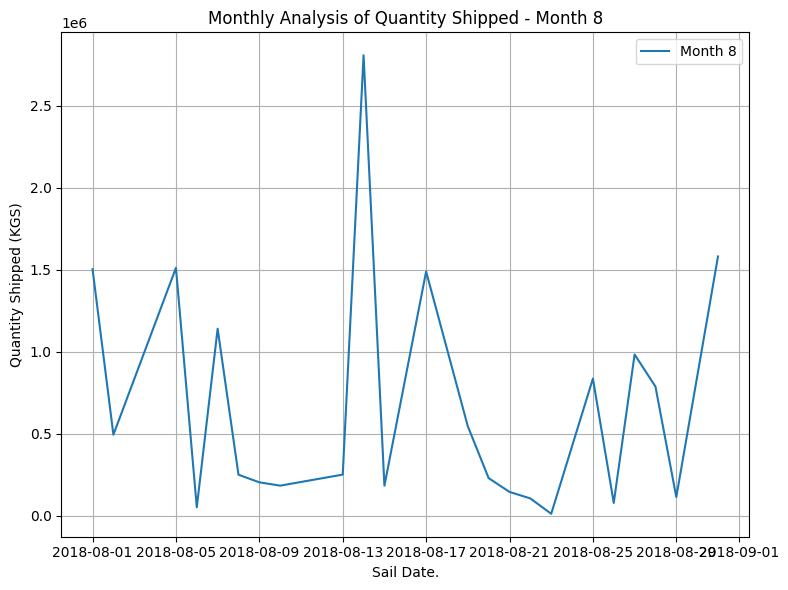

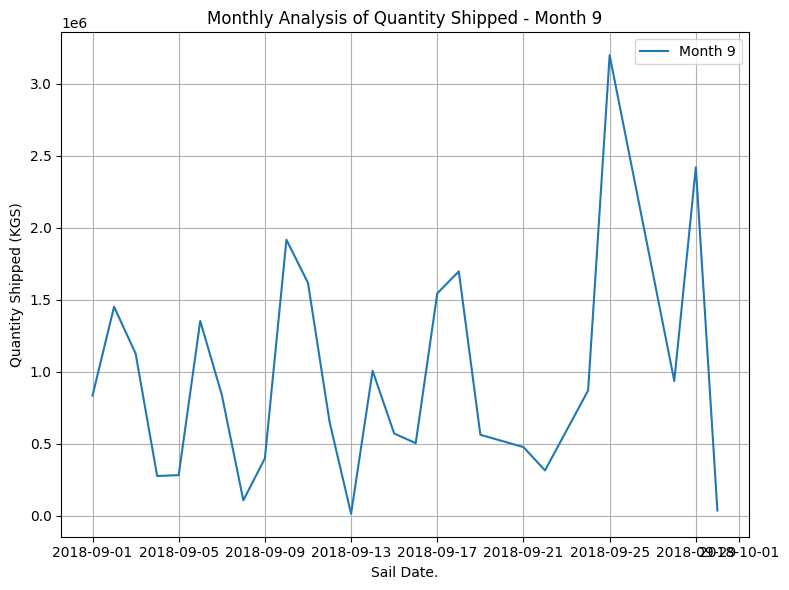

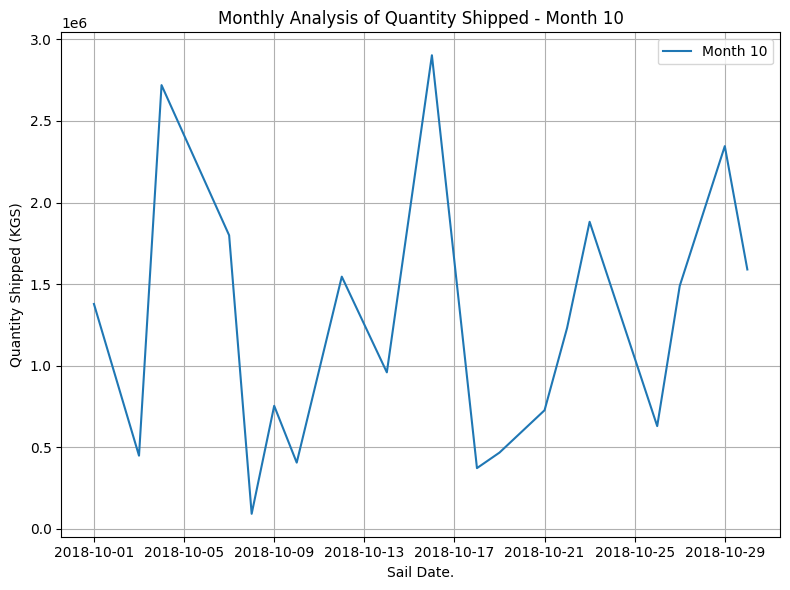

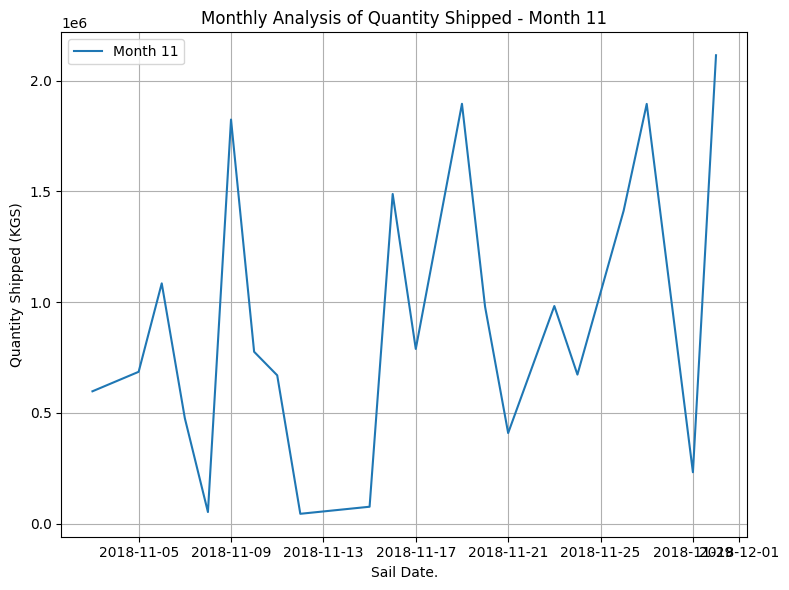

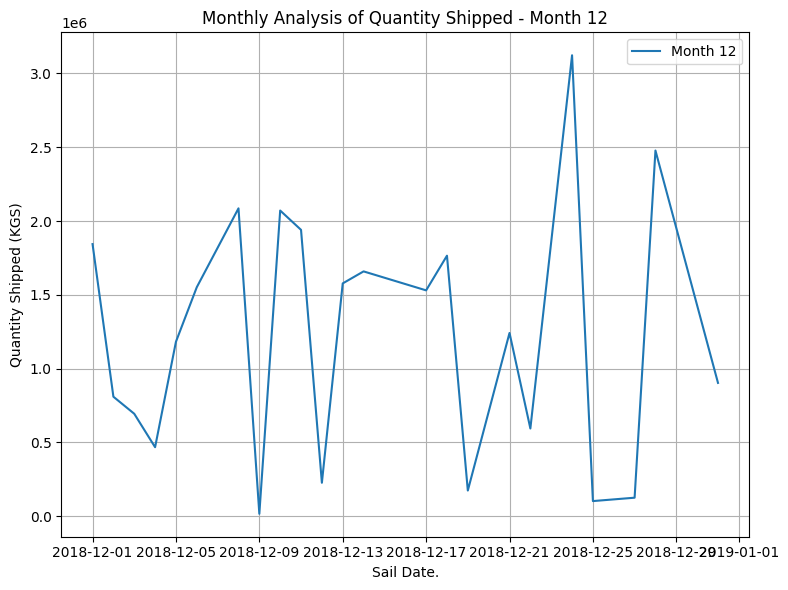

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Check if the column containing the date information is datetime
if 'Sail Date.' in daily_sales.columns:
    # Convert 'Sail Date.' to datetime with a specific format if needed
    try:
        daily_sales['Sail Date.'] = pd.to_datetime(daily_sales['Sail Date.'], format='%Y-%m-%d')
    except ValueError:
        print("Error: Unable to convert 'Sail Date.' to datetime. Check the date format.")

    # Check if conversion was successful
    if pd.api.types.is_datetime64_any_dtype(daily_sales['Sail Date.']):
        # Extract year and month from the 'Sail Date.' column
        daily_sales['Month'] = daily_sales['Sail Date.'].dt.month

        # Iterate over each month
        for month in range(1, 13):
            # Filter the data for the current month
            month_data = daily_sales[daily_sales['Month'] == month]

            # Plotting
            plt.figure(figsize=(8, 6))
            plt.plot(month_data['Sail Date.'], month_data['QTY.(KGS)'], marker='', linestyle='-', label=f'Month {month}')
            plt.xlabel('Sail Date.')
            plt.ylabel('Quantity Shipped (KGS)')
            plt.title(f'Monthly Analysis of Quantity Shipped - Month {month}')
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()
    else:
        print("Error: 'Sail Date.' column could not be converted to datetime.")
else:
    print("Error: 'Sail Date.' column not found in the DataFrame.")


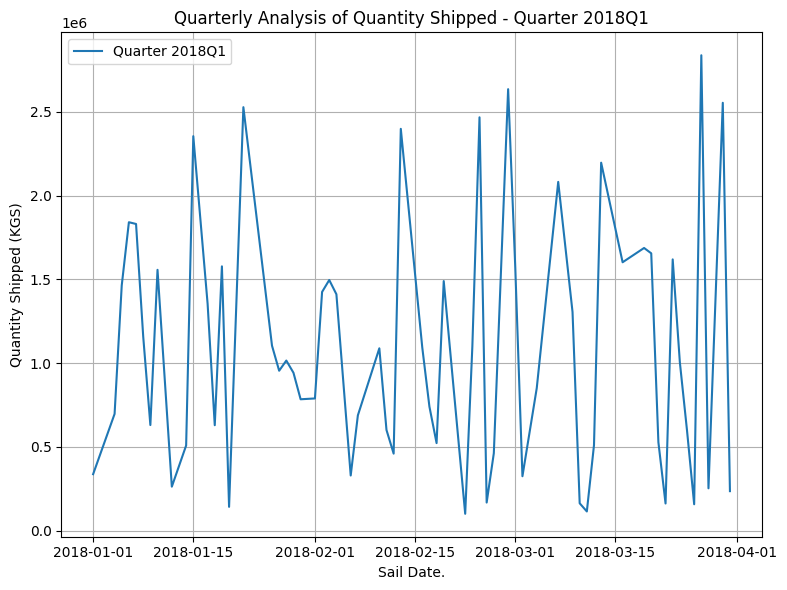

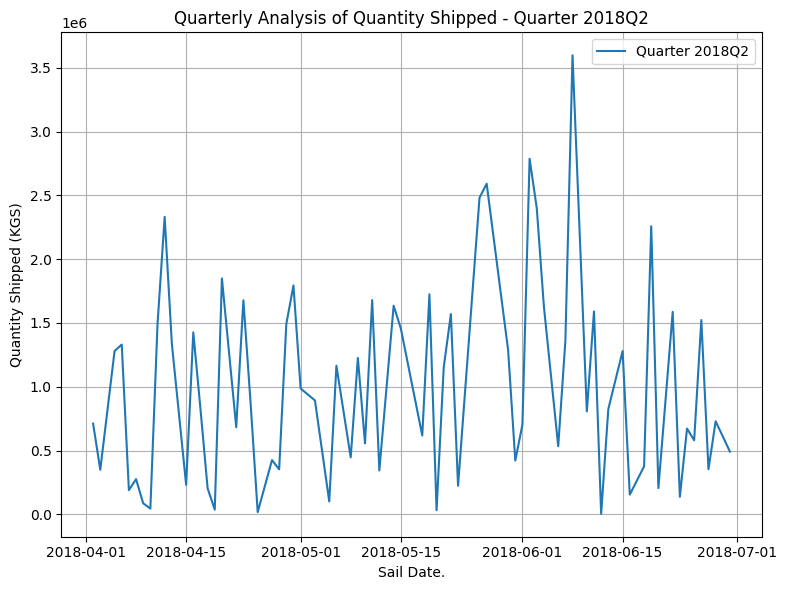

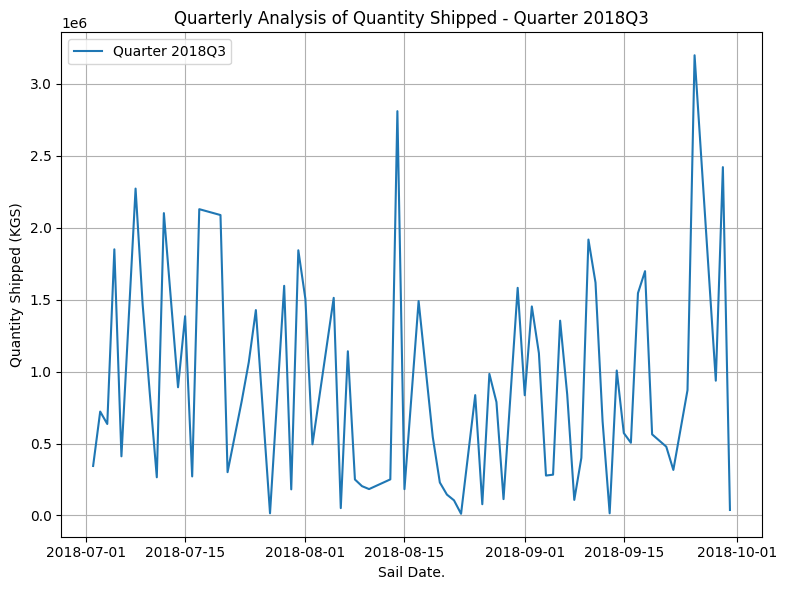

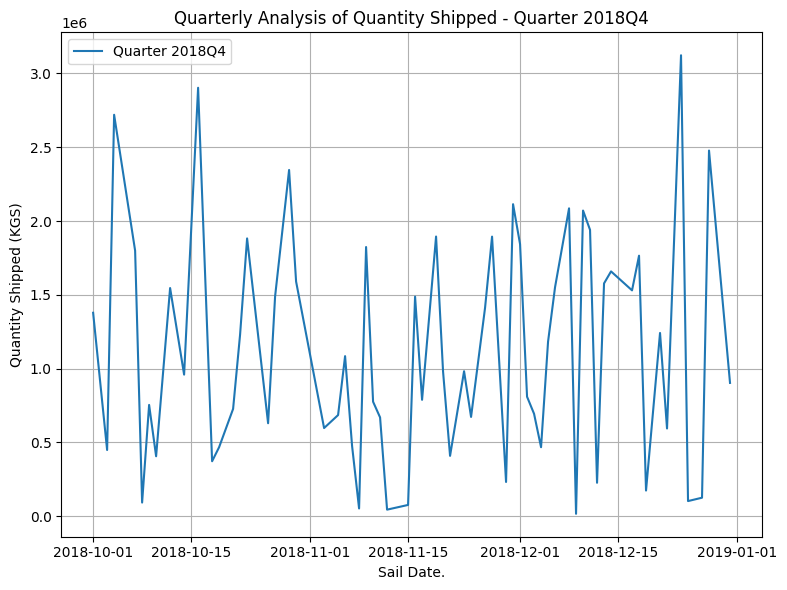

In [96]:


# Assuming daily_sales is your DataFrame containing the sales data
# Replace 'Sail Date.' with the actual name of your date column

# Check if the column containing the date information is datetime
if 'Sail Date.' in daily_sales.columns and pd.api.types.is_datetime64_any_dtype(daily_sales['Sail Date.']):
    # Group the data by quarters
    daily_sales['Quarter'] = daily_sales['Sail Date.'].dt.to_period('Q')

    # Iterate over each quarter
    for quarter in daily_sales['Quarter'].unique():
        # Filter the data for the current quarter
        quarter_data = daily_sales[daily_sales['Quarter'] == quarter]

        # Plotting
        plt.figure(figsize=(8, 6))
        plt.plot(quarter_data['Sail Date.'], quarter_data['QTY.(KGS)'], marker='', linestyle='-', label=f'Quarter {quarter}')
        plt.xlabel('Sail Date.')
        plt.ylabel('Quantity Shipped (KGS)')
        plt.title(f'Quarterly Analysis of Quantity Shipped - Quarter {quarter}')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
else:
    print("Error: 'Sail Date.' column could not be converted to datetime.")


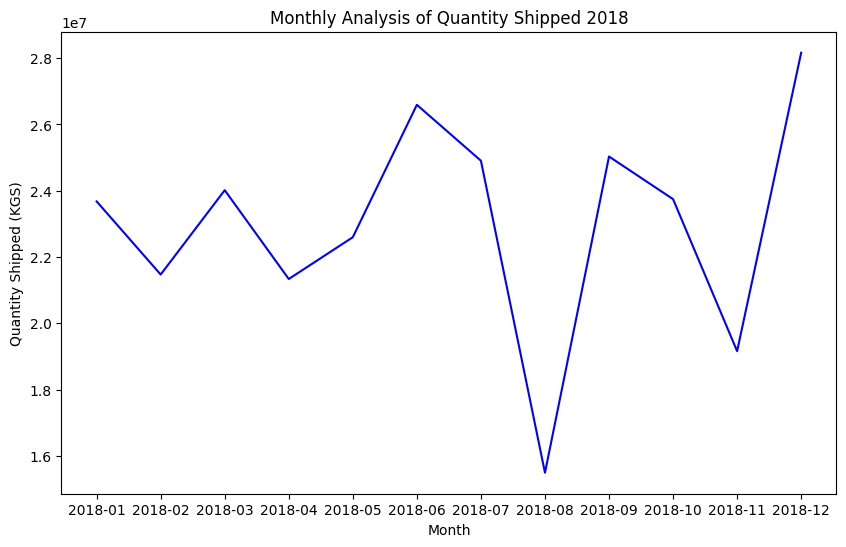

In [97]:
import matplotlib.pyplot as plt

# Assuming daily_sales is your DataFrame containing the sales data

# Check if the 'Sail Date.' column is datetime
if pd.api.types.is_datetime64_any_dtype(daily_sales['Sail Date.']):
    # Extract year and month from the 'Sail Date.' column
    daily_sales['Month'] = daily_sales['Sail Date.'].dt.to_period('M')

    # Group the data by month and calculate the total quantity shipped for each month
    monthly_data = daily_sales.groupby('Month')['QTY.(KGS)'].sum()

    # Create a new figure
    plt.figure(figsize=(10, 6))

    # Plotting each quarter with a different color
    plt.plot(monthly_data.index.astype(str), monthly_data.values, marker='', linestyle='-', color='blue')  # Plot all months in blue
    
    # Set labels and title
    plt.xlabel('Month')
    plt.ylabel('Quantity Shipped (KGS)')
    plt.title('Monthly Analysis of Quantity Shipped 2018')

    # Show the plot
    plt.show()
else:
    print("Error: 'Sail Date.' column could not be converted to datetime.")


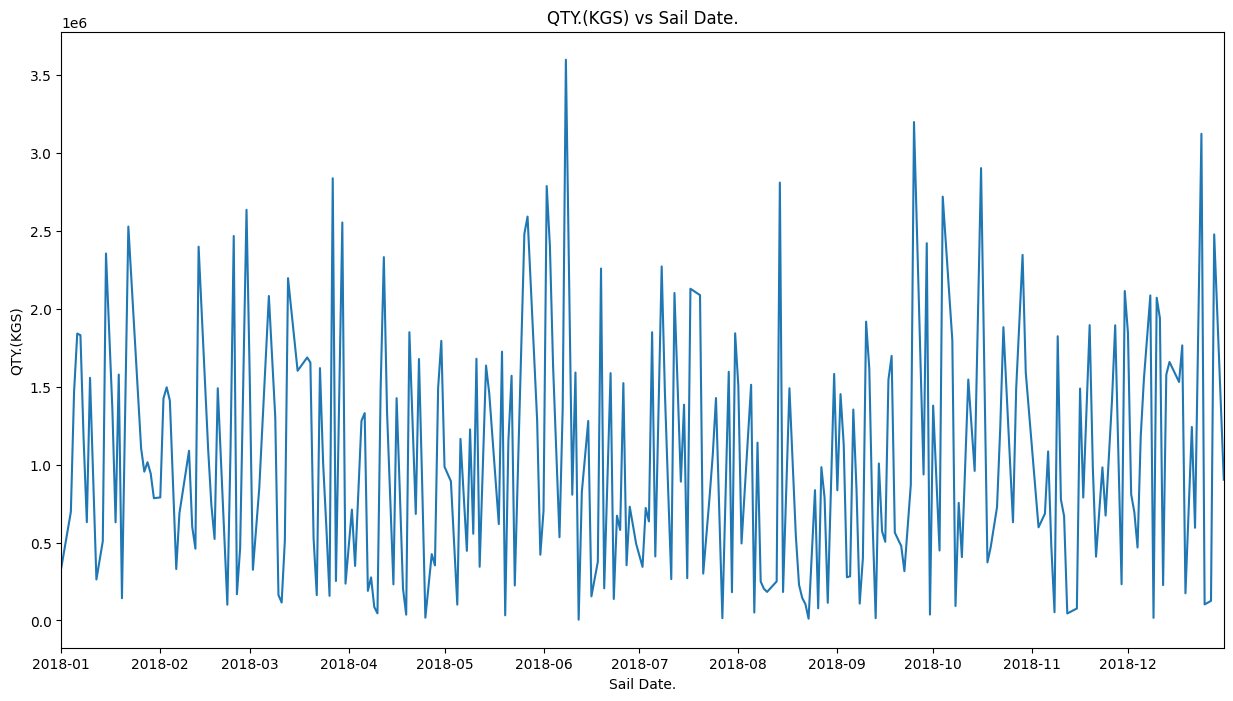

In [98]:

plt.figure(figsize=(15,8))
plt.plot(daily_sales['Sail Date.'], daily_sales['QTY.(KGS)'])
plt.xlabel('Sail Date.')
plt.ylabel('QTY.(KGS)')
plt.title('QTY.(KGS) vs Sail Date.')
plt.xlim(daily_sales['Sail Date.'].min(), daily_sales['Sail Date.'].max())
plt.show()



In [99]:
daily_sales.shape

(268, 4)

In [100]:

# Find duplicate rows based on all columns
duplicate_rows = data[data.duplicated()]

# Display the number of duplicate rows
print("Number of duplicate rows:", len(duplicate_rows))

Number of duplicate rows: 1516


In [101]:
# Find duplicate rows based on specific columns (e.g., 'Column1' and 'Column2')
duplicate_rows = data[data.duplicated(subset=['Sail Date.','QTY.(KGS)'])]
print("Number of duplicate rows:", len(duplicate_rows))


Number of duplicate rows: 1516


<Figure size 1200x800 with 0 Axes>

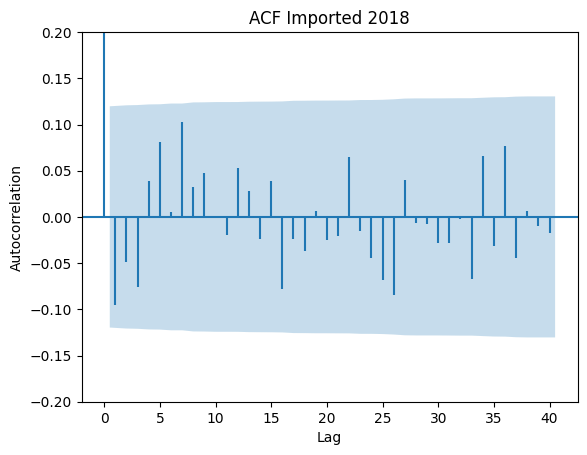

In [102]:
from statsmodels.graphics.tsaplots import plot_acf

# Assuming daily_sales is your DataFrame containing the sales data

# Specify the column name
sail_date_column = 'Sail Date.'

# Check if the specified column exists in the DataFrame
if sail_date_column in daily_sales.columns:
    # Attempt to convert 'Sail Date.' to datetime
    try:
        daily_sales[sail_date_column] = pd.to_datetime(daily_sales[sail_date_column])
    except ValueError as e:
        # Print the error message and problematic values
        print(f"Error: Unable to convert '{sail_date_column}' to datetime.")
        print("Problematic values:")
        problematic_values = daily_sales.loc[~daily_sales[sail_date_column].apply(lambda x: pd.to_datetime(str(x), errors='coerce')).notna(), sail_date_column]
        print(problematic_values)
    
    # Check if the column was successfully converted to datetime
    if pd.api.types.is_datetime64_any_dtype(daily_sales[sail_date_column]):
        # Set 'Sail Date.' column as index
        daily_sales.set_index(sail_date_column, inplace=True)
        
        # Increase figure size
        plt.figure(figsize=(12, 8))

        # Plot the autocorrelation function (ACF)
        plot_acf(daily_sales['QTY.(KGS)'], lags=40, marker=None)  # Adjust lags as needed
        plt.xlabel('Lag')
        plt.ylabel('Autocorrelation')
        plt.title('ACF Imported 2018')
        
        # Set y-axis limits
        plt.ylim(-0.20, 0.20)
        
        plt.show()
    else:
        print(f"Error: '{sail_date_column}' column exists but could not be converted to datetime.")
else:
    print(f"Error: '{sail_date_column}' column not found in the DataFrame.")


In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# Check if the 'Sail Date.' column exists in the DataFrame
if 'Sail Date.' in daily_sales.columns:
    # Check if the column containing the date information is datetime
    if pd.api.types.is_datetime64_any_dtype(daily_sales['Sail Date.']):
        # Convert 'Sail Date.' to datetime with a specific format if needed
        try:
            daily_sales['Sail Date.'] = pd.to_datetime(daily_sales['Sail Date.'], format='%Y-%m-%d')
        except ValueError:
            print("Error: Unable to convert 'Sail Date.' to datetime. Check the date format.")

        # Check if conversion was successful
        if pd.api.types.is_datetime64_any_dtype(daily_sales['Sail Date.']):
            # Extract year and month from the 'Sail Date.' column
            daily_sales['Month'] = daily_sales['Sail Date.'].dt.month

            # Iterate over each month
            for month in range(1, 13):
                # Filter the data for the current month
                month_data = daily_sales[daily_sales['Month'] == month]

                # Plotting
                plt.figure(figsize=(8, 6))
                plt.plot(month_data['Sail Date.'], month_data['QTY.(KGS)'], marker='o', linestyle='-', label=f'Month {month}')
                plt.xlabel('Sail Date.')
                plt.ylabel('Quantity Shipped (KGS)')
                plt.title(f'Monthly Analysis of Quantity Shipped - Month {month}')
                plt.legend()
                plt.grid(True)
                plt.tight_layout()
                plt.show()
        else:
            print("Error: 'Sail Date.' column could not be converted to datetime.")
    else:
        print("Error: 'Sail Date.' column does not contain datetime data.")



In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# Check if the column containing the date information is datetime
if 'Sail Date.' in daily_sales.columns:
    # Convert 'Sail Date.' to datetime with a specific format if needed
    try:
        daily_sales['Sail Date.'] = pd.to_datetime(daily_sales['Sail Date.'], format='%Y-%m-%d')
    except ValueError:
        print("Error: Unable to convert 'Sail Date.' to datetime. Check the date format.")

    # Check if conversion was successful
    if pd.api.types.is_datetime64_any_dtype(daily_sales['Sail Date.']):
        # Extract year and month from the 'Sail Date.' column
        daily_sales['Month'] = daily_sales['Sail Date.'].dt.month

        # Iterate over each month
        for month in range(1, 13):
            # Filter the data for the current month
            month_data = daily_sales[daily_sales['Month'] == month]

            # Plotting
            plt.figure(figsize=(8, 6))
            plt.plot(month_data['Sail Date.'], month_data['QTY.(KGS)'], marker='o', linestyle='-', label=f'Month {month}')
            plt.xlabel('Sail Date.')
            plt.ylabel('Quantity Shipped (KGS)')
            plt.title(f'Monthly Analysis of Quantity Shipped - Month {month}')
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()
    else:
        print("Error: 'Sail Date.' column could not be converted to datetime.")
else:
    print("Error: 'Sail Date.' column not found in the DataFrame.")


Error: 'Sail Date.' column not found in the DataFrame.
